# STAT207 Mini-Project #1 - How does the Genre impact the relationship between sales and review scores?


YOUR NAME

**Delete this code block before submitting**

You should delete and add cells as you see fit.

Don't forget to put written text in **markdown** cells. To change a cell from a <u>code block</u> to a <u>markdown cell</u>:
* Click on the cell you'd like to modify.
* Go to 'Cell' at the top of the page.
* Go to 'Cell Type' in the drop down menu and click on either 'Code' or 'Markdown'.


In [94]:
#Imports here
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## 1. Introduction

This dataset was found by Dr.Joe Cox, a Faculty of Business & Law, School of Accounting, Economics and Finance at the University of Portsmouth. The following dataset has data on thousands of video games between 2004 and 2010. There are various observations including genre, sales, handheld, publishers, platform, and various other observations. In this report, we are going to analyze how does the nature of the relationship between review score and sales change for different genres in this dataset. My motivation for using these variables is to analyze what genres have the best relationship with review scores and sales. Specific publishers could use these finds to determine what games they make or why their games might not produce the reviews and sales they want. 

## 2. Dataset Discussion

In [95]:
df = pd.read_csv("video_games.csv")
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [107]:
df.shape[0]

1212

This dataset was downloaded from Professor Ellison's Canvas page, and she downloaded this file from https://corgis-edu.github.io/corgis/csv/video_games/ on 9/8/2023. I downloaded this file on 2/7/2024. Each row in this dataset represents a different video game and was collected by analyzing various video games from 2004 to 2010. This dataset is a sample, finding data for all video games from 2004 to 2010 would be extremely difficult considering all different publishers, genres, platforms, consoles, and games in certain reasons. The impact of these actions that a researcher might take depends on the research questions. Specifically, for my research question a sample instead of a population can be more efficient. Additionally, the researcher should be cautious about generalizing findings from the sample dataset to the broader population of video games, as the sample may not be fully representative.

## 3. Dataset Cleaning

In [108]:
df1 = df[["Metadata.Genres", "Metrics.Review Score" , "Metrics.Sales"]]
df1

,Metadata.Genres,Metrics.Review Score,Metrics.Sales
0,Action,85,4.69
1,Strategy,89,0.56
2,"Action,Racing / Driving,Sports",81,0.54
3,Sports,81,0.49
4,Action,61,0.45
...,...,...,...
1207,Adventure,71,0.03
1208,"Action,Adventure",62,0.03
1209,"Action,Strategy",51,0.03
1210,Adventure,64,0.02


In [172]:
df2 = df1.rename(columns={'Metadata.Genres': 'Genres', 'Metrics.Review Score': 'Review_Score', 'Metrics.Sales': 'Sales'})
df2 = df2[(df2["Genres"] == "Action") | (df2["Genres"] == "Sports") | (df2["Genres"] == "Adventure") | (df2["Genres"] == "Role-Playing (RPG)")]
df2


,Genres,Review_Score,Sales
0,Action,85,4.69
3,Sports,81,0.49
4,Action,61,0.45
8,Sports,68,0.25
13,Action,74,0.14
...,...,...,...
1205,Action,70,0.03
1206,Role-Playing (RPG),67,0.03
1207,Adventure,71,0.03
1210,Adventure,64,0.02


In [174]:
df1.shape[0]-df2.shape[0]

497

In [175]:
df2.isna().sum()

Genres          0
Review_Score    0
Sales           0
dtype: int64

In [173]:
df2.value_counts()

Genres  Review_Score  Sales
Action  72            0.24     2
        47            0.07     2
        53            0.35     2
        71            0.15     2
        68            0.16     2
                              ..
        70            0.14     1
                      0.19     1
                      0.22     1
                      0.23     1
Sports  88            0.48     1
Name: count, Length: 682, dtype: int64

In [136]:
np.unique(df2["Sales"].values)

array([1.000e-02, 2.000e-02, 3.000e-02, 4.000e-02, 5.000e-02, 6.000e-02,
       7.000e-02, 8.000e-02, 9.000e-02, 1.000e-01, 1.100e-01, 1.200e-01,
       1.300e-01, 1.400e-01, 1.500e-01, 1.600e-01, 1.700e-01, 1.800e-01,
       1.900e-01, 2.000e-01, 2.100e-01, 2.200e-01, 2.300e-01, 2.400e-01,
       2.500e-01, 2.600e-01, 2.700e-01, 2.800e-01, 2.900e-01, 3.000e-01,
       3.100e-01, 3.200e-01, 3.300e-01, 3.400e-01, 3.500e-01, 3.600e-01,
       3.700e-01, 3.800e-01, 3.900e-01, 4.000e-01, 4.100e-01, 4.200e-01,
       4.300e-01, 4.400e-01, 4.500e-01, 4.600e-01, 4.700e-01, 4.800e-01,
       4.900e-01, 5.000e-01, 5.100e-01, 5.200e-01, 5.300e-01, 5.400e-01,
       5.500e-01, 5.600e-01, 5.700e-01, 5.800e-01, 5.900e-01, 6.000e-01,
       6.100e-01, 6.200e-01, 6.400e-01, 6.500e-01, 6.600e-01, 6.700e-01,
       6.800e-01, 6.900e-01, 7.000e-01, 7.300e-01, 7.400e-01, 7.500e-01,
       7.600e-01, 7.700e-01, 8.000e-01, 8.100e-01, 8.200e-01, 8.300e-01,
       8.400e-01, 8.500e-01, 8.600e-01, 8.700e-01, 

In [176]:
np.unique(df2["Genres"].values)

array(['Action', 'Adventure', 'Role-Playing (RPG)', 'Sports'],
      dtype=object)

In [178]:
np.unique(df2["Review_Score"].values)

array([19, 25, 27, 28, 30, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
       80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
       97])

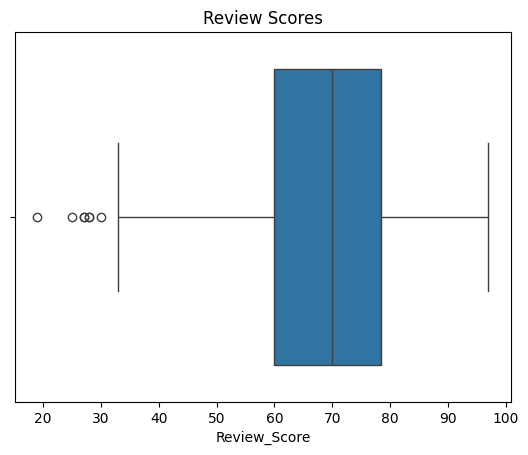

In [179]:
sns.boxplot(x=df2['Review_Score'])
plt.title('Review Scores')
plt.show()

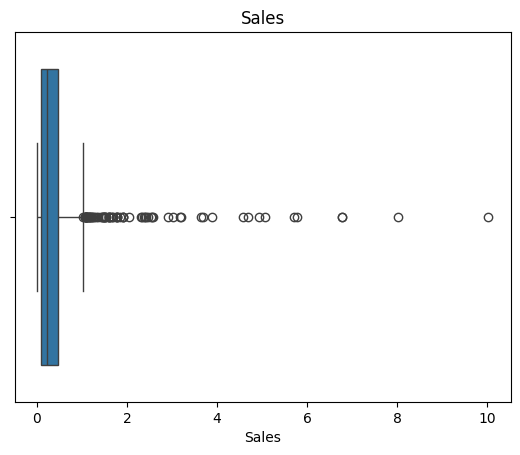

In [180]:
sns.boxplot(x=df2['Sales'])
plt.title('Sales')
plt.show()

In this dataset there are not any implicit or explicit missing values. We can conclude this because after using the unique function from numpy there was no evidence of "NaN", "none", or other strings in the datasets.  The pros of removing any of these values if they were present is the avoidance of bias, maintaining sample representativeness, and the preservation of the datasets's integrity. The cons of removing these potential values could you may lose insights into rare events or extreme conditions that could be important. If outliers are not truly false data points but rather genuine observations of the this dateaset being studied, removing them can bias the results of statistical analyses, leading to inaccurate conclusions. I chose to not drop any outliers because I believe this would not accurately represent the dataset because there are no truly false data points. I didn't clean any data, however, I did limit the amount of genres for video games. I decided to keep the most common ones to mitigate this overlap. I decided to specifically keep action, adventure, Role-Playing (RPG), and Sports. While these aren't implicit or explicit missing values, 497 rows were dropped and the dataset was easier to work with. 

## 4. <u>Research Question</u>: How does the Relationship between `x` and `y` Change based on Different Values of `z` in the Dataset?

Text(0.5, 1.0, 'Sales vs Review Score Per Genre')

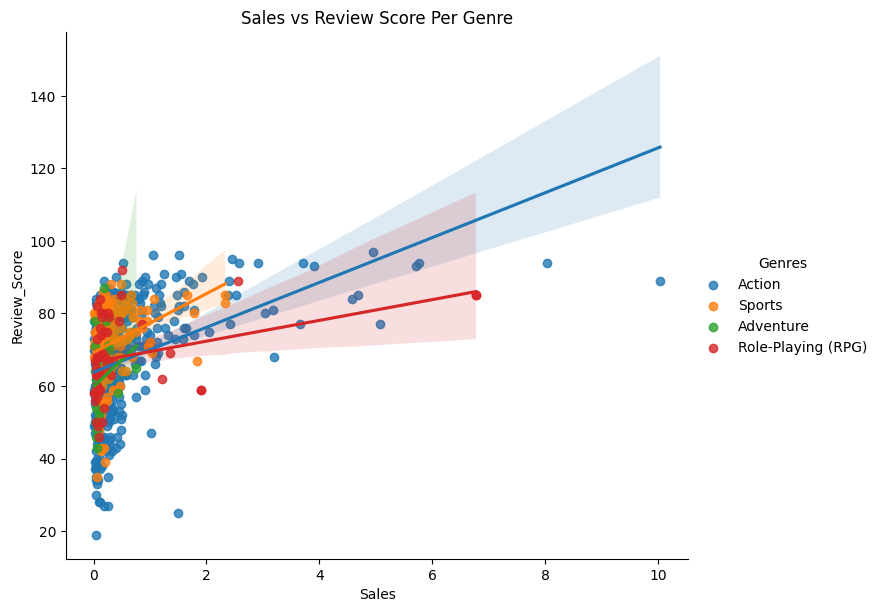

In [190]:
sns.lmplot( data = df2 , x = 'Sales' , y = 'Review_Score', hue = 'Genres' , height= 6 , aspect =1.2)
plt.title("Sales vs Review Score Per Genre")

In [168]:
genres  = [ "Genres",
           "Sales",
           "Review_Score"]


In [195]:


df2 = df1.rename(columns={'Metadata.Genres': 'Genres', 'Metrics.Review Score': 'Review_Score', 'Metrics.Sales': 'Sales'})
df2 = df2[(df2["Genres"] == "Action") | (df2["Genres"] == "Sports") | (df2["Genres"] == "Adventure") | (df2["Genres"] == "Role-Playing (RPG)")]

genres  = [ "Genres",
           "Sales",
           "Review_Score"  ] 

r_squared_values = {}

for var in genres:
    formula = f'Sales ~ Review_Score + {var}' 
    model = smf.ols(formula=formula, data=df2).fit()
    r_squared_values[var] = model.rsquared

for var, r_squared in r_squared_values.items():
    print(f'Sales with Review Score and {var}: R^2 = {r_squared}')



Sales with Review Score and Genres: R^2 = 0.15481433875824746
Sales with Review Score and Sales: R^2 = 1.0
Sales with Review Score and Review_Score: R^2 = 0.13318722958845808


In [194]:
genrecorr = df2.groupby("Genres").corr()
genrecorr

Review_Score     Sales
Genres                                                 
Action             Review_Score      1.000000  0.412171
                   Sales             0.412171  1.000000
Adventure          Review_Score      1.000000  0.228729
                   Sales             0.228729  1.000000
Role-Playing (RPG) Review_Score      1.000000  0.352899
                   Sales             0.352899  1.000000
Sports             Review_Score      1.000000  0.293519
                   Sales             0.293519  1.000000

There is not a strong correlation between sales, review score, and genre. I thought there would be a stronger correlation. With specific genres it was intersting to see how the R^2 values were different. For action video games, the Sales and Review Score had the strongest correlation. After this project we can see that coefficient for each Genre is positive. But for action, the coefficient for "Review Score" is larger in absolute compared to others, it suggests that the effect of Review Score on Sales is stronger for this particular genre. There weren't any direction changes, shape changes, and the strength of the relationship for Action, review score, and sales have a stronger association than the other genres. While adventure does have shortest trend line, it is the steepest the than rest of the genres. 

## 5. Conclusion

By examining the coefficients associated with each genre, we can identify how the relationship between sales and review scores varies across different genres. This analysis provides insights into which genres are more sensitive to changes in review scores and which ones are less affected.After the project we can see that the relationship between sales and review scores remains positive as genres change. For the genres I selected Action has the highest correlation coefficient and for every one-unit increase in the review score, sales increase by approximately 0.412 units. The genre affected the least by this was Adventure, but the relationship is weakly positive. One major shortcoming is I did not consider all genres in the dataset. This would have made the dataset more accurate because there are some crossover genres and my sample might not accurately portray this. For future work, companies can go more in depth into this dataset and see what games they could make to see if they can increase revenue. 